In [1]:
import numpy as np
import matplotlib.pyplot as mp
from sklearn.cluster import KMeans
from pylab import show
data = np.loadtxt("/Users/wangfei/Documents/Courses/CS/CS412/HW/HW1/data.csv")
data_nolabel = data[:,1:]
data

array([[ 6.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [ 5.   , -1.   , -1.   , ..., -0.671, -0.828, -1.   ],
       [ 4.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       ...,
       [ 3.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [ 0.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [ 1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ]])

In [2]:
cluster = np.arange(2,20)
inertia = []
for clusterNumber in cluster:
    inertia.append(KMeans(n_clusters=clusterNumber, init='random').fit(data_nolabel).inertia_)

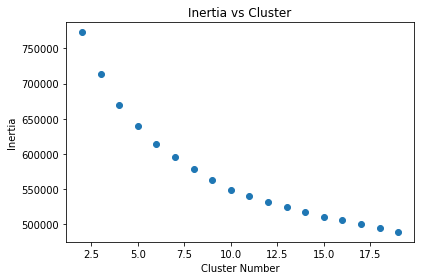

In [3]:
img_path = '/Users/wangfei/Documents/Courses/CS/CS412/HW/HW5/Figure/'
fig = mp.figure()
mp.title("Inertia vs Cluster")
mp.scatter(cluster,inertia)
mp.xlabel("Cluster Number")
mp.ylabel("Inertia")
fig.tight_layout()
fig.savefig(img_path + 'Figure5_1.png', dpi = 300)
show()

In [4]:
inertia_1 = []
for clusterNumber in cluster:
    inertia_1.append(KMeans(n_clusters=clusterNumber, init='random', n_init=1,max_iter=1).fit(data_nolabel).inertia_)

inertia_1

[803054.0485485756,
 752694.1853694221,
 746963.0813656561,
 710740.3754228163,
 686319.6387191268,
 631540.4066726676,
 661595.1942056247,
 608268.160707417,
 595080.0275258379,
 599200.0616980693,
 605747.399534092,
 572018.9982876698,
 594292.7409678925,
 558212.8548663044,
 575037.6130572859,
 560488.9971573454,
 547059.8119007745,
 539260.0039930474]

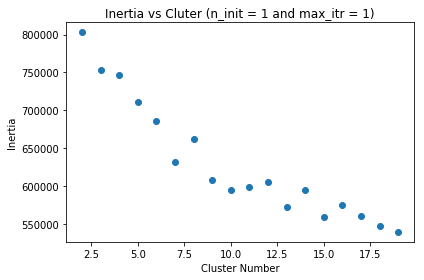

In [5]:
fig = mp.figure()
mp.title("Inertia vs Cluter (n_init = 1 and max_itr = 1)")
mp.scatter(cluster,inertia_1)
mp.xlabel("Cluster Number")
mp.ylabel("Inertia")
fig.tight_layout()
fig.savefig(img_path + 'Figure5_2.png', dpi = 300)
show()



In [38]:
n_iter = []
for clusterNumber in cluster:
    n_iter.append(KMeans(n_clusters=clusterNumber, init='random').fit(data_nolabel).n_iter_)
n_iter


[9, 40, 28, 47, 23, 43, 26, 26, 27, 48, 30, 68, 41, 40, 72, 57, 24, 58]

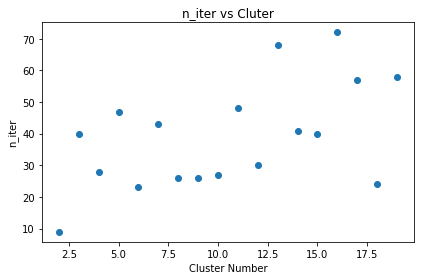

In [39]:
fig = mp.figure()
mp.title("n_iter vs Cluter")
mp.scatter(cluster,n_iter)
mp.xlabel("Cluster Number")
mp.ylabel("n_iter")
fig.tight_layout()
#fig.savefig(img_path + 'Figure5_3.png', dpi = 300)
show()

In [8]:
label = []
label.append(KMeans(n_clusters=20, init='random').fit(data_nolabel).labels_)
label

[array([13, 11, 12, ..., 18, 16,  0], dtype=int32)]

In [9]:
def ExtractFeat(dataset,label):
    X = []   ##mean
    Y = []   ##std
    colors = []
    for index in range(len(dataset)):
        X.append(np.mean(dataset[index]))
        Y.append(np.std(dataset[index]))  
        if(label[index]=="1.0"):
            colors.append("b")
        elif(label[index]=="2.0"):
            colors.append("g")
        elif(label[index]=="3.0"):
            colors.append("purple")
        elif(label[index]=="4.0"):
            colors.append("c")
        elif(label[index]=="5.0"):
            colors.append("m")
        elif(label[index]=="6.0"):
            colors.append("y")
        elif(label[index]=="7.0"):
            colors.append("k")
        elif(label[index]=="8.0"):
            colors.append("olive")
        elif(label[index]=="9.0"):
            colors.append("orange")   
        else:
            colors.append("r")
    return [X, Y, colors];

features = []
digits = []
for row in data:
    features.append(row[1:])
    digits.append(str(row[0]))

##normalization     
def normalize(lists):
    norm = [i * 2/(max(lists)-min(lists))+
            1-2*max(lists)/(max(lists)-min(lists)) for i in lists]
    return norm;

Xnorm = normalize(ExtractFeat(features,digits)[0])
Ynorm = normalize(ExtractFeat(features,digits)[1])
Xnorm_np = np.asarray(Xnorm)
Ynorm_np = np.asarray(Ynorm)
twofeatures = np.column_stack((Xnorm_np,Ynorm_np))
c = ExtractFeat(features,digits)[2]



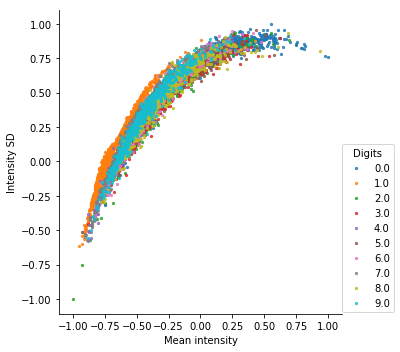

In [35]:
import seaborn as sns
import pandas as pd
# original 2D data separation by mean intensity and intensity SD
df = pd.DataFrame({'xnorm': Xnorm,
                   'ynorm': Ynorm,
                   'digits': digits})
facet = sns.lmplot(data=df, x='xnorm', y='ynorm', hue='digits', scatter_kws={"s": 5},
           fit_reg=False, legend=False)
facet.set(xlabel='Mean intensity', ylabel='Intensity SD')
facet.ax.legend(bbox_to_anchor=[1.2, 0.575], title="Digits", fancybox=True)
facet.savefig(img_path + 'Figure5.png', dpi = 300)

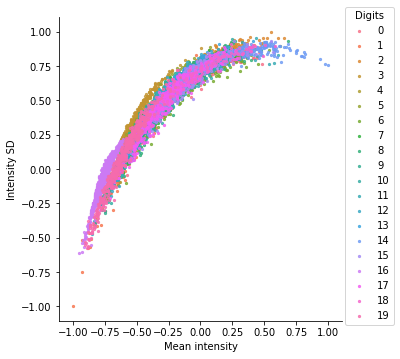

In [34]:
###Graduate student question g)
pred_g = np.asarray(KMeans(n_clusters=20, init='random').fit(data_nolabel).labels_)
pred_g = pred_g.tolist()
df_20clus = pd.DataFrame({'xnorm': Xnorm,
                          'ynorm': Ynorm,
                          'Prediction': pred_g})
facet_20clus = sns.lmplot(data=df_20clus, x='xnorm', y='ynorm', hue='Prediction', 
                          scatter_kws={"s": 5},fit_reg=False, legend=False)
facet_20clus.set(xlabel='Mean intensity', ylabel='Intensity SD')
facet_20clus.ax.legend(bbox_to_anchor=[1.2, 1.05], title="Digits", fancybox=True)
facet_20clus.savefig(img_path + 'Figure5_graduate.png', dpi = 300)

In [12]:
pred = np.asarray(KMeans(n_clusters=10, init='random').fit(data_nolabel).labels_)
pred = pred.tolist()

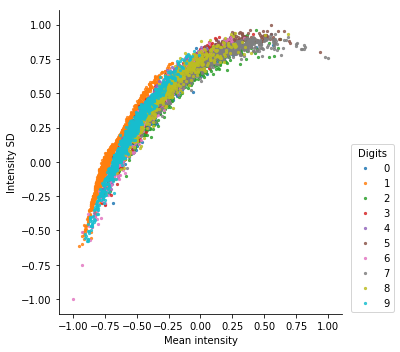

In [13]:
df_10clus = pd.DataFrame({'xnorm': Xnorm,
                          'ynorm': Ynorm,
                          'Prediction': pred})
facet_10clus = sns.lmplot(data=df_10clus, x='xnorm', y='ynorm', hue='Prediction', 
                          scatter_kws={"s": 5},fit_reg=False, legend=False)
facet_10clus.set(xlabel='Mean intensity', ylabel='Intensity SD')
facet_10clus.ax.legend(bbox_to_anchor=[1.2, 0.575], title="Digits", fancybox=True)
facet_10clus.savefig(img_path + 'Figure5_4.png')

In [45]:
a = np.transpose(np.array([pred,digits]))
np.savetxt('/Users/wangfei/Documents/Courses/CS/CS412/HW/HW5/Figure/10kMean.csv', a, fmt='%s')
from sklearn import metrics
metrics.adjusted_rand_score(digits,pred) 

array([['3', '6.0'],
       ['2', '5.0'],
       ['6', '4.0'],
       ...,
       ['2', '3.0'],
       ['7', '0.0'],
       ['1', '1.0']], dtype='<U21')

In [50]:
np.random.seed(100)
np.random.shuffle(data)
numTrain = int(len(features)*0.2)
trainFeatures = features[:numTrain]
testFeatures = features[numTrain:]
trainDigits = digits[:numTrain]
testDigits = digits[numTrain:]
from sklearn.svm import SVC
SVC(kernel='poly',degree=2,C=38.88155180308085,
    gamma='auto').fit(trainFeatures,trainDigits).score(testFeatures,testDigits)

0.12326418652494428